### data8数据

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [49]:
dataset = pd.read_csv('data/data8.csv',engine='python')

In [50]:
dataset

,硫酸高压循环泵,data
0,36661428,NaN
1,36661500,72.0
2,36661608,108.0
3,36661716,108.0
4,36661788,72.0
...,...,...
145,36675396,72.0
146,36675504,108.0
147,36675612,108.0
148,36675648,36.0


In [51]:
dataset = dataset.fillna(0)
dataset

,硫酸高压循环泵,data
0,36661428,0.0
1,36661500,72.0
2,36661608,108.0
3,36661716,108.0
4,36661788,72.0
...,...,...
145,36675396,72.0
146,36675504,108.0
147,36675612,108.0
148,36675648,36.0


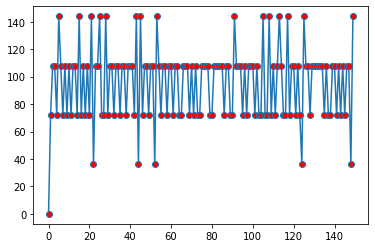

In [52]:
plt.plot(list(range(0,150)),dataset["data"],marker='o',markerfacecolor="r")

In [53]:
#set variable
rs = np.random.RandomState(169)
lendata = dataset.shape[0]
outliers_fraction = 0.04
test_data = []
anomaly = []

In [54]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a, b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [55]:
#read dataset x,y
x = normalize(pd.DataFrame(dataset, columns=["data"]),-1,1)

In [56]:
ifm = IsolationForest(n_estimators=100,verbose=2,n_jobs=2,max_samples=lendata,random_state=rs,max_features=1)

In [57]:
ifm.fit(x)

Building estimator 1 of 50 for this parallel run (total 100)...Building estimator 1 of 50 for this parallel run (total 100)...

Building estimator 2 of 50 for this parallel run (total 100)...Building estimator 2 of 50 for this parallel run (total 100)...

Building estimator 3 of 50 for this parallel run (total 100)...Building estimator 3 of 50 for this parallel run (total 100)...

Building estimator 4 of 50 for this parallel run (total 100)...Building estimator 4 of 50 for this parallel run (total 100)...

Building estimator 5 of 50 for this parallel run (total 100)...Building estimator 5 of 50 for this parallel run (total 100)...

Building estimator 6 of 50 for this parallel run (total 100)...Building estimator 6 of 50 for this parallel run (total 100)...

Building estimator 7 of 50 for this parallel run (total 100)...Building estimator 7 of 50 for this parallel run (total 100)...

Building estimator 8 of 50 for this parallel run (total 100)...Building estimator 8 of 50 for this paral

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


IsolationForest(max_features=1, max_samples=150, n_jobs=2,
                random_state=RandomState(MT19937) at 0x7FEB6794D140, verbose=2)

In [58]:
scores_pred = ifm.decision_function(x)

In [59]:
scores_pred

array([-0.35201686,  0.03353395,  0.05255375,  0.05255375,  0.03353395,
       -0.10712468,  0.05255375,  0.03353395,  0.05255375,  0.03353395,
        0.05255375,  0.03353395,  0.05255375,  0.05255375,  0.03353395,
       -0.10712468,  0.03353395,  0.05255375,  0.03353395,  0.05255375,
        0.03353395, -0.10712468, -0.17991035,  0.05255375,  0.05255375,
       -0.10712468,  0.03353395,  0.03353395, -0.10712468,  0.03353395,
        0.05255375,  0.05255375,  0.03353395,  0.05255375,  0.05255375,
        0.03353395,  0.05255375,  0.05255375,  0.03353395,  0.05255375,
        0.05255375,  0.05255375,  0.03353395, -0.10712468, -0.17991035,
       -0.10712468,  0.03353395,  0.05255375,  0.05255375,  0.03353395,
        0.05255375,  0.05255375, -0.17991035, -0.10712468,  0.05255375,
        0.03353395,  0.05255375,  0.05255375,  0.03353395,  0.05255375,
        0.05255375,  0.03353395,  0.05255375,  0.05255375,  0.03353395,
        0.03353395,  0.05255375,  0.05255375,  0.05255375,  0.03

In [60]:
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

In [61]:
threshold

-0.11003610728985949

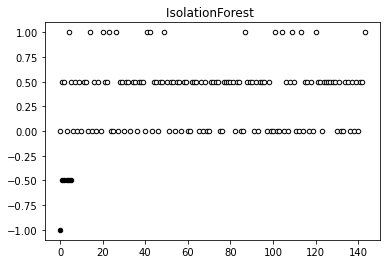

In [62]:
plt.title("IsolationForest ")
for i in scores_pred:
    if i <= threshold:
        #print(i)
        test_data.append(1)
        anomaly.append(i)
    else:
        test_data.append(0)
        
ano_lable = np.column_stack(((dataset['硫酸高压循环泵'],dataset['data'],x,scores_pred, test_data)))
df = pd.DataFrame(data=ano_lable, columns=['硫酸高压循环泵','data','x', 'IsoFst_Score','label'])

b = plt.scatter(list(range(0,144)),df['x'][df['label'] == 0], s=20, edgecolor='k',c='white')
c = plt.scatter(list(range(0,6)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [63]:
ano_lable = np.column_stack(((df['硫酸高压循环泵'],df['data'],x,scores_pred, test_data)))

In [64]:
df = pd.DataFrame(data=ano_lable, columns=['硫酸高压循环泵','data','x', 'IsoFst_Score','label'])

In [65]:
df

,硫酸高压循环泵,data,x,IsoFst_Score,label
0,36661428.0,0.0,-1.0,-0.352017,1.0
1,36661500.0,72.0,0.0,0.033534,0.0
2,36661608.0,108.0,0.5,0.052554,0.0
3,36661716.0,108.0,0.5,0.052554,0.0
4,36661788.0,72.0,0.0,0.033534,0.0
...,...,...,...,...,...
145,36675396.0,72.0,0.0,0.033534,0.0
146,36675504.0,108.0,0.5,0.052554,0.0
147,36675612.0,108.0,0.5,0.052554,0.0
148,36675648.0,36.0,-0.5,-0.179910,1.0


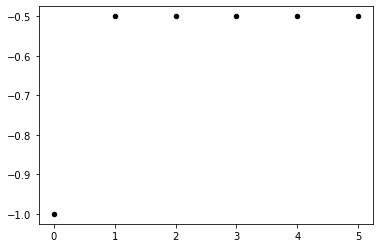

In [66]:
c = plt.scatter(list(range(0,6)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [67]:
print("孤立森林阈值  ：",threshold)
print("全量数据样本数：",len(dataset),"个")
print("检测异常样本数：",len(anomaly),"个")

孤立森林阈值  ： -0.11003610728985949
全量数据样本数： 150 个
检测异常样本数： 6 个
